# Regression Model for Bike sharing demand of BoomBikes Organization

### 1: Importing Needed Libraries

In [1]:
#imporitng the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import warnings

warnings.filterwarnings('ignore')

### 2: Loading Dataset

In [2]:
#Read the csv file using pandas library
bikeSharingData = pd.read_csv('day.csv')

In [3]:
#Inspect first few rows to get visually understanding of data set
bikeSharingData.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#check the shape of data set to undertsand number of data point and number of features
bikeSharingData.shape

(730, 16)

In [5]:
#check the details of numerical data
bikeSharingData.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
#check dataframe for null and datatype 
bikeSharingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
#Inspect unique values
bikeSharingData.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

#### There are 730 rows and 16 columns in the data set. All values are non null.
Below columns are categorical columns based on data definition as well as based on number of unique values for these columns
- yr
- mnth
- season
- weekday
- workingday
- holiday
- weathersit


## 3: Cleaning Data

3.1 Drop columns which we are not going to use in analysis

- `instant` is just a row id with no business behavioural meaning.
- Removing `casual` and `registered` since we are interesting in predicting `cnt` variable only.

In [8]:
# Droping instant column
bikeSharingData.drop(['instant'], axis = 1, inplace = True)

# Dropping casual and registered columns
bikeSharingData.drop(['casual'], axis = 1, inplace = True)
bikeSharingData.drop(['registered'], axis = 1, inplace = True)

In [9]:
#Inspect data frame after dropping
bikeSharingData.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


Columns season, mnth, weekday and weathersit are numerical although they should be non-numerical categories. They should be repalced with dummy variable in below section.

3.2 Handle Missing values

We have seen no nulls.

3.3 Handle Outliers

In [10]:
### get column names handy
bikeSharingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 74.3+ KB


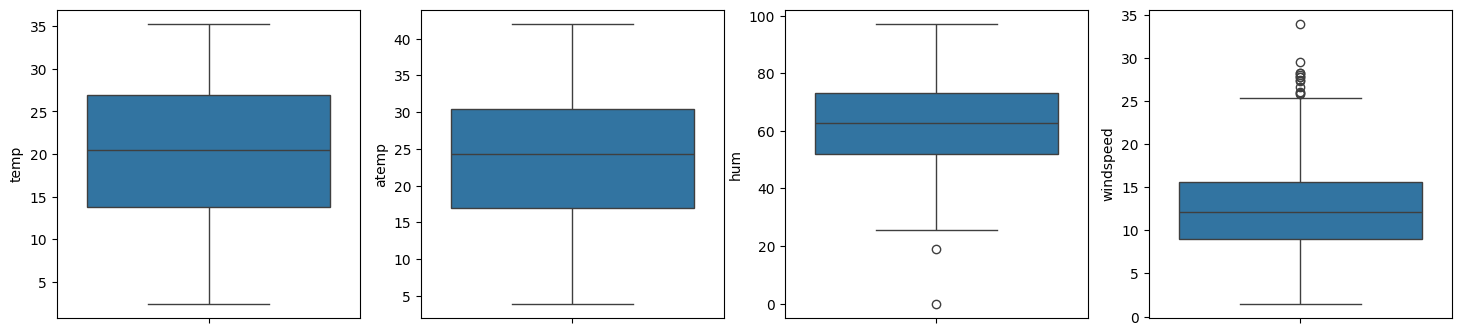

In [11]:
# Draw box plots for continuous variables (categorial numerical columns are not continuos types)
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

index = 1
for col in cols:
    plt.subplot(1,len(cols),index)
    sns.boxplot(y=col, data=bikeSharingData)
    index+=1

From these plots, we can see there are no outliers to be handled. (not values are at extreme end)

## 4. EDA

#### 4.1 Derived variable

In [12]:
# Age of business based of date of data point collected and taking start date of business as '01-01-2018'
bikeSharingData['business_age'] = (pd.to_datetime(bikeSharingData['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days
# Dropping dteday as we have extracted all needed derived varible from it. (some of these already existed like mnth, weekday etc)
bikeSharingData.drop(['dteday'], axis = 1, inplace = True)


In [13]:
bikeSharingData['business_age'].describe()

count    730.000000
mean     364.500000
std      210.877136
min        0.000000
25%      182.250000
50%      364.500000
75%      546.750000
max      729.000000
Name: business_age, dtype: float64

#### 4.2 Convert numerical categorical columns to labeled categorial which will help in getting mearningfule name when we create dummy variable.

In [14]:
bikeSharingData.weathersit.replace({1:'Clear', 2:'Misty', 3:'Cloudy', 4:'Bad'}, inplace = True)
bikeSharingData.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"}, inplace = True)
bikeSharingData.mnth.replace({1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug', 9: 'sept', 10: 'oct', 11: 'nov', 12: 'dec'}, inplace = True)
bikeSharingData.weekday.replace({0: 'sun', 1: 'mon', 2: 'tue', 3: 'wed', 4: 'thu', 5: 'fri', 6: 'sat'}, inplace = True)
bikeSharingData.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,business_age
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,4


#### 4.3 Draw pair Plots to check the linear relationship

<Figure size 1500x3000 with 0 Axes>

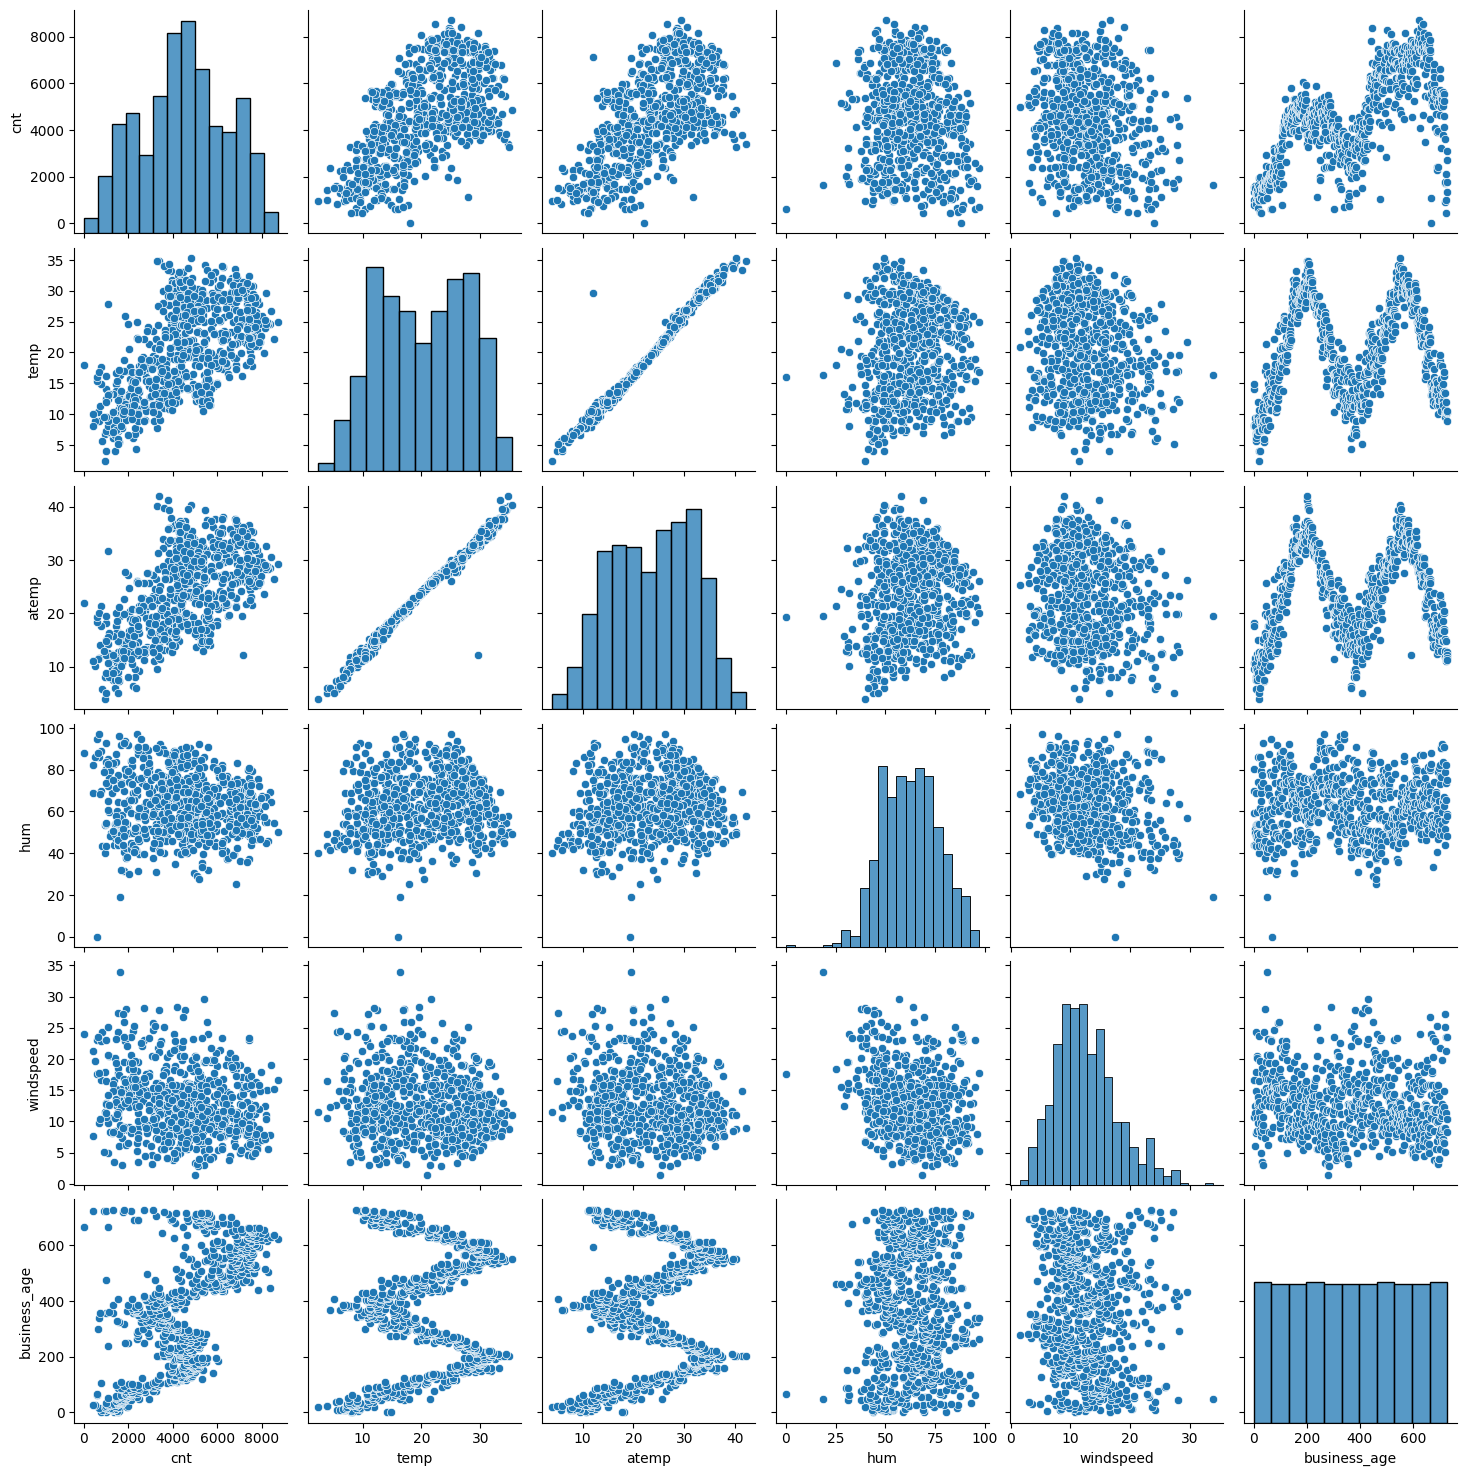

In [15]:
#Draw pairplots for continuous numeric variables using seaborn
plt.figure(figsize = (15,30))
sns.pairplot(data=bikeSharingData,vars=['cnt', 'temp', 'atemp', 'hum','windspeed', 'business_age'])
plt.show()

#### Inference
- Looks like the `temp` and `atemp` has the highest corelation with the target variable `cnt`
- `temp` and `atemp` are highly co-related with each other too
- `business_age` also has some degree of correlation with `cnt`

#### 4.4 Visualising the Data to Find the Correlation between the Numerical Variable

<Figure size 2000x1500 with 0 Axes>

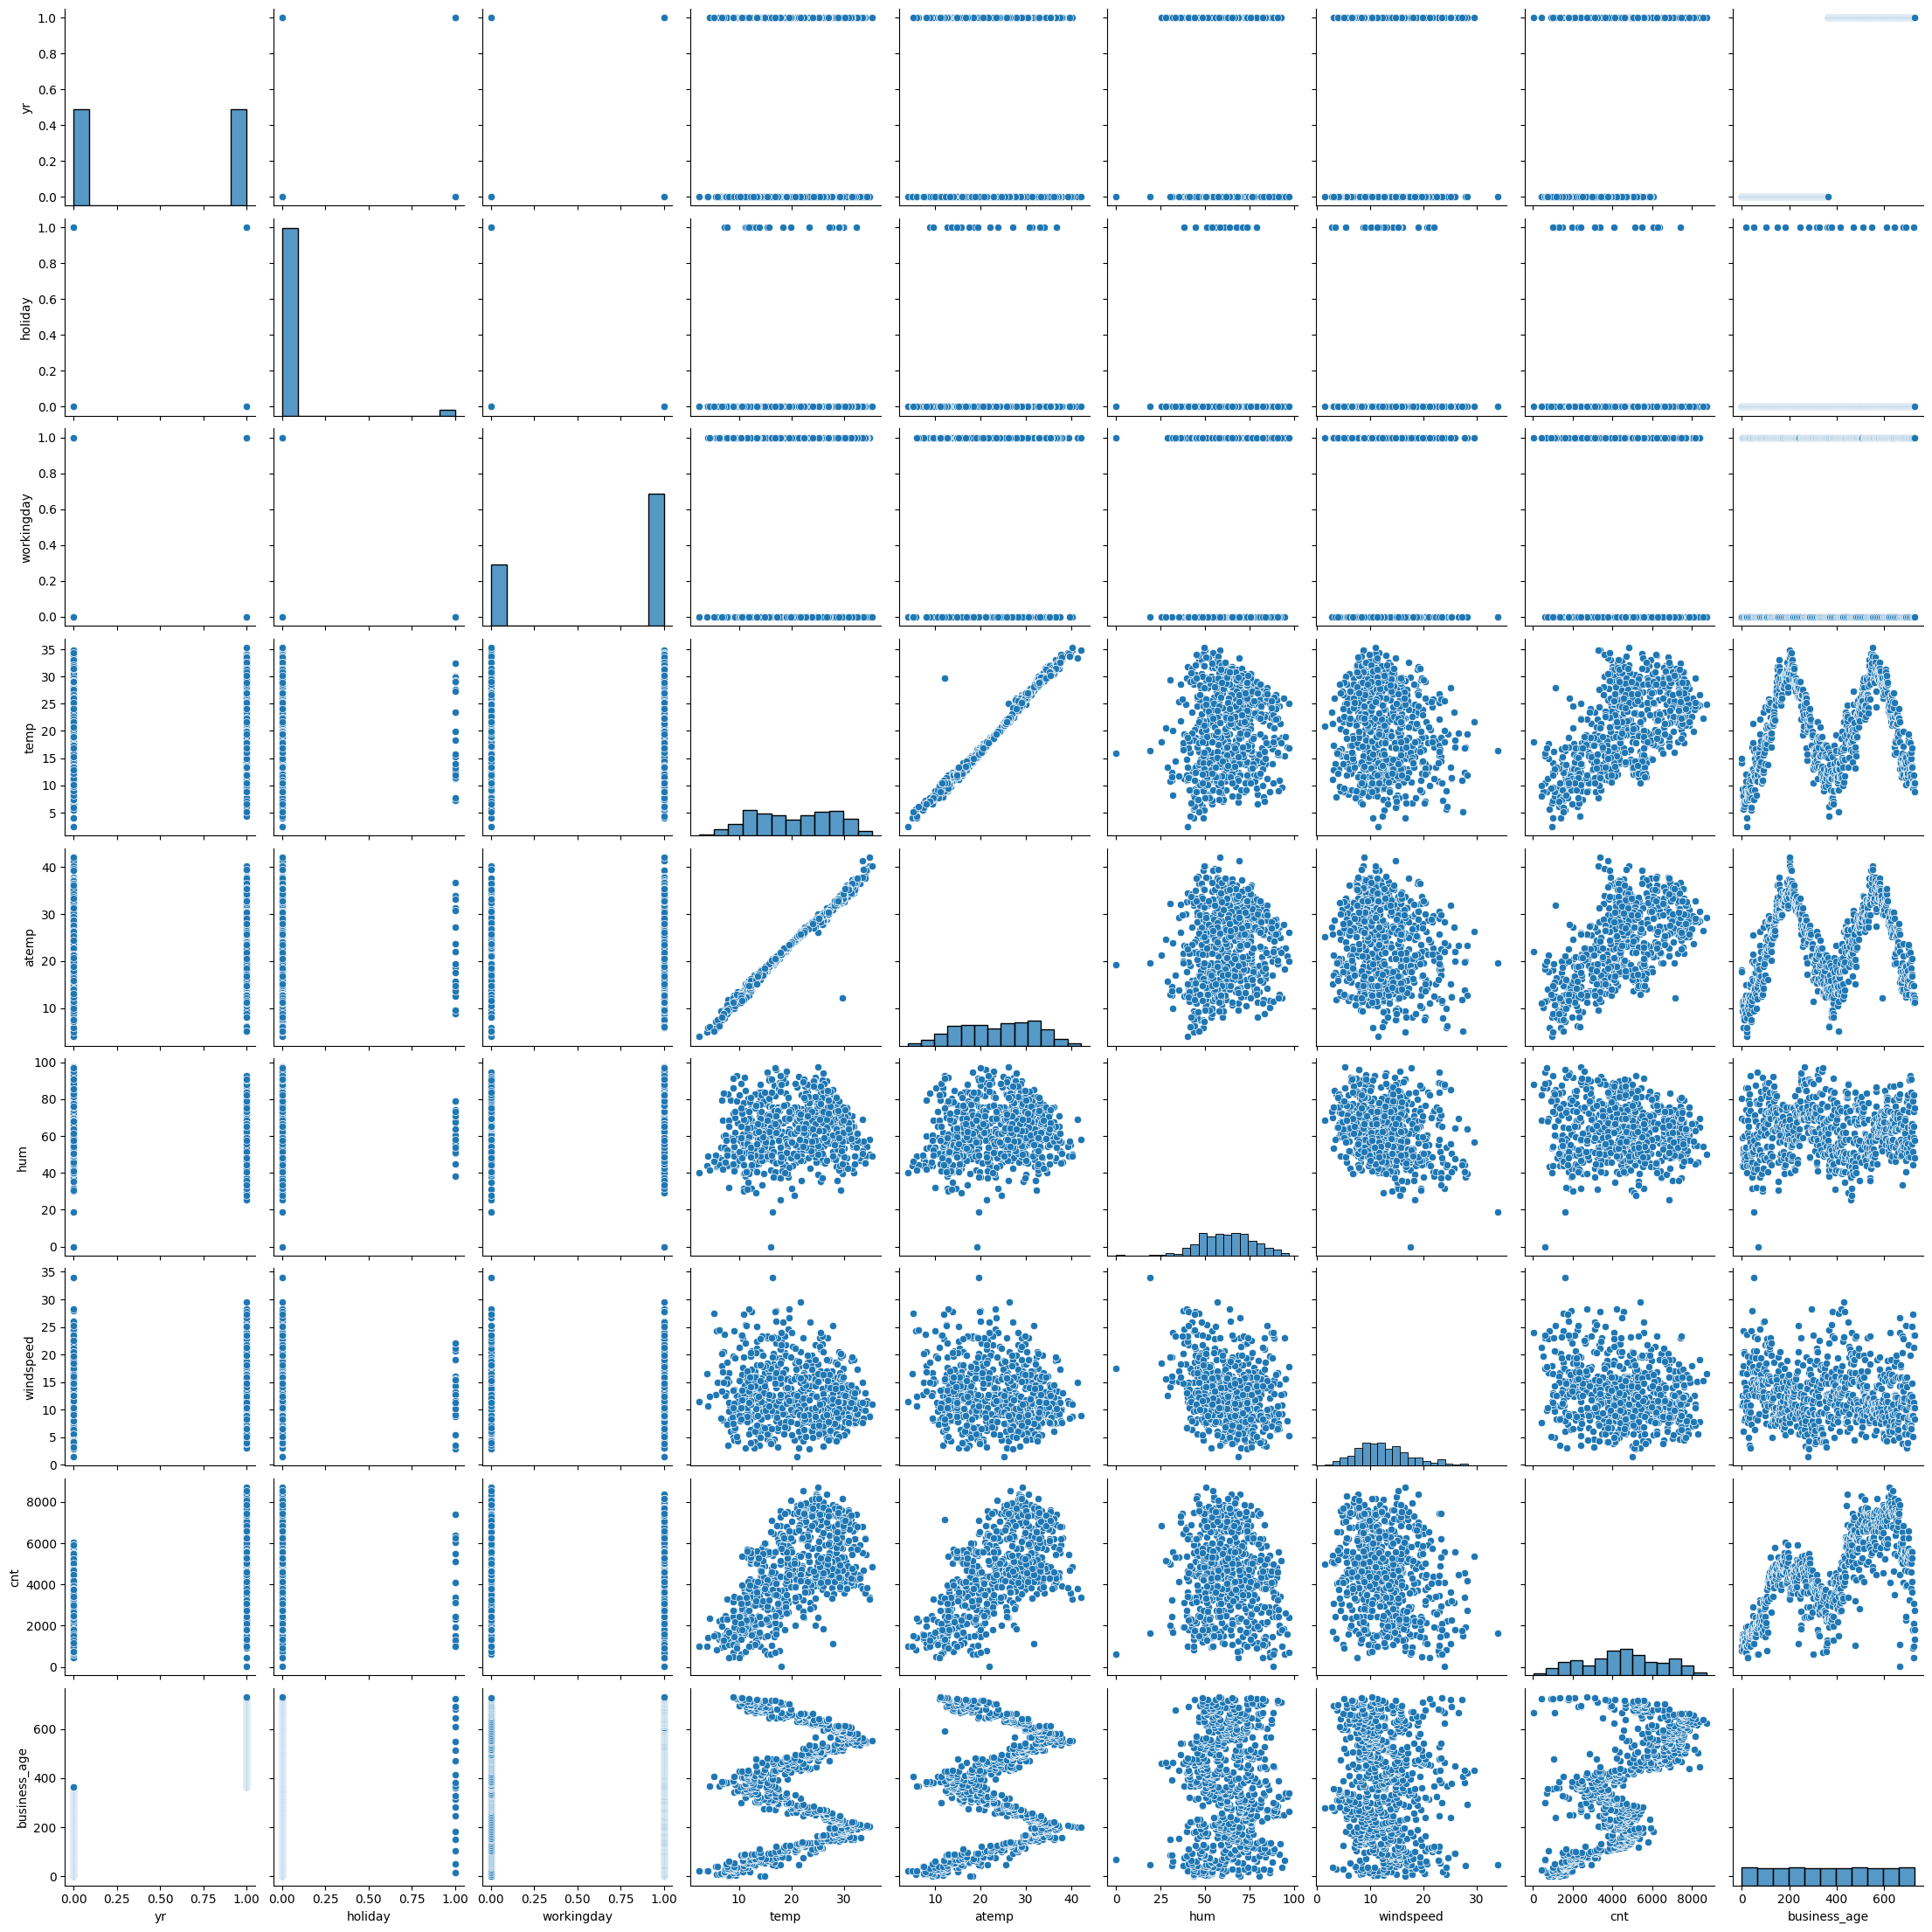

In [16]:
plt.figure(figsize=(20,15))
sns.pairplot(bikeSharingData)
plt.show()

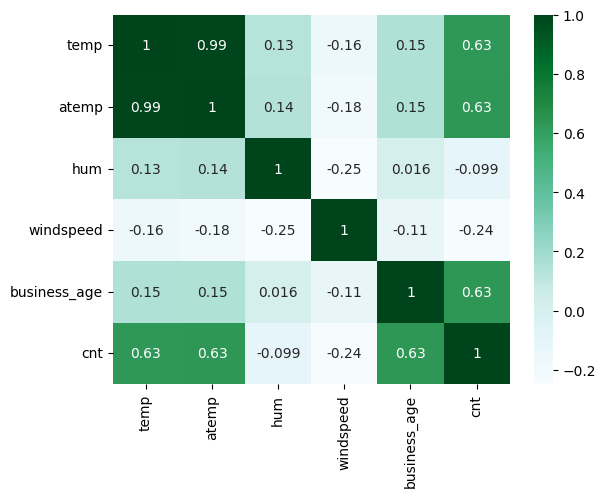

In [17]:
# Checking continuous variables relationship with each other
sns.heatmap(bikeSharingData[['temp', 'atemp', 'hum', 'windspeed', 'business_age', 'cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

#### Inference

- Here we see that temp and atemp are strongly correlated with each other (more than .99 means) and atemp seems to be derived from temp. Hence we can drop atemp.
- We also see that temp, atemp and business_age are the top correlating features with target variable cnt

#### 4.5 Analysing Categorical Variabels with target variables

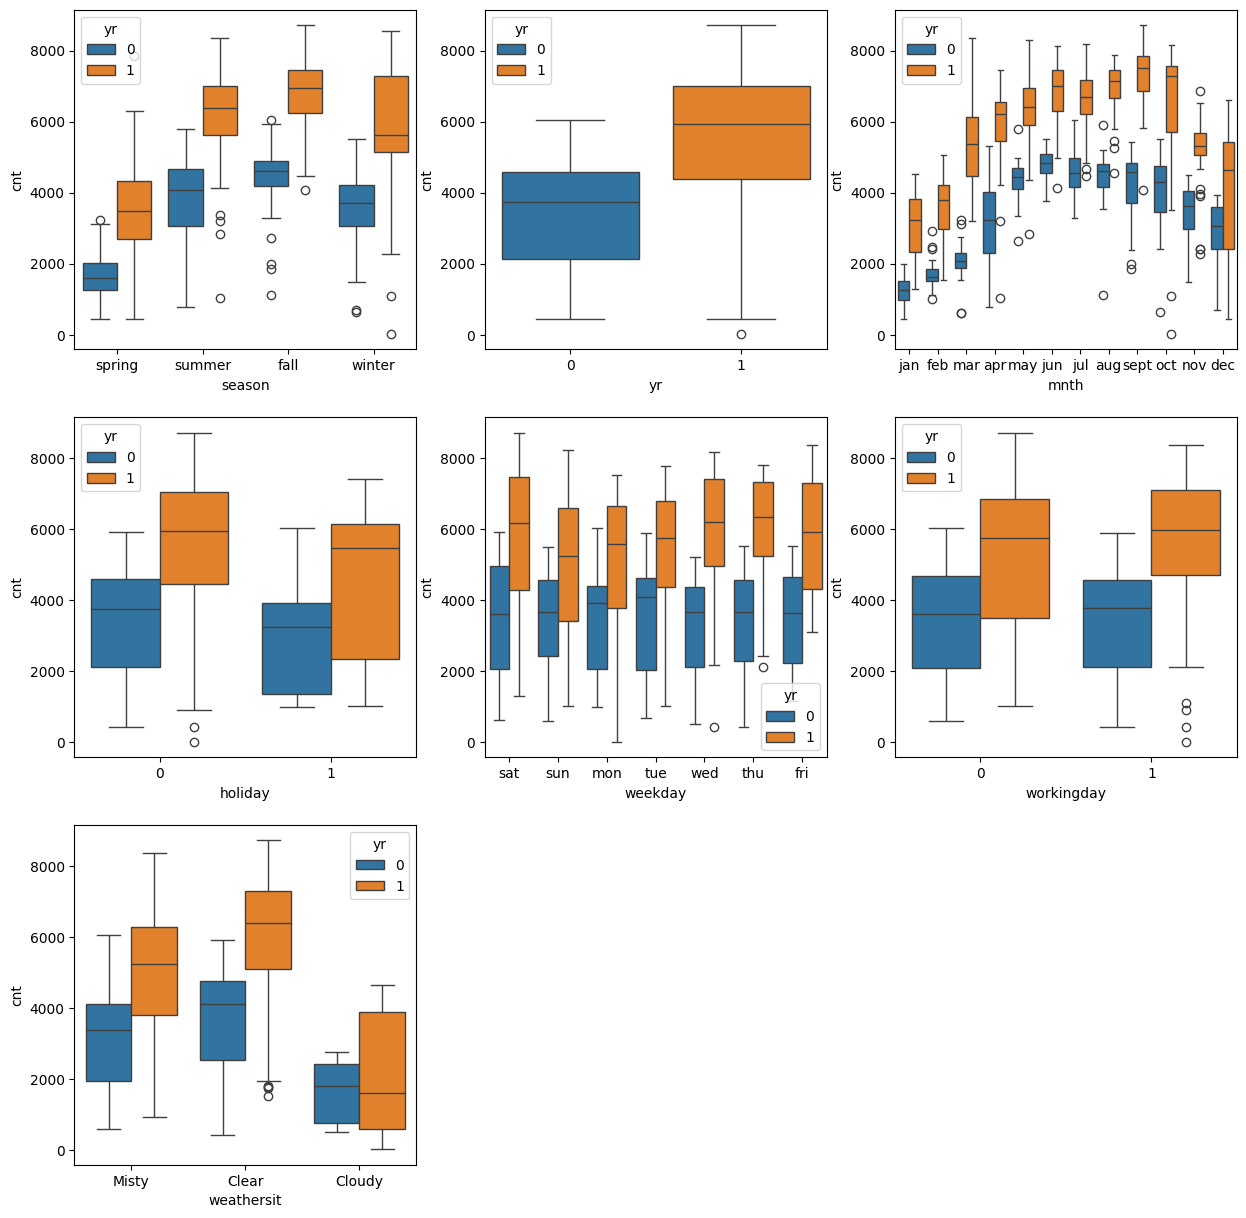

In [18]:
# Boxplot for categorical variables to see demands
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bikeSharingData, x=i[1], y='cnt', hue='yr')
plt.show()

#### Inference:
Here many insights can be drawn from the plots

1. Demand year or year is growing
2. Season-3:fall has highest demand for rental bikes
3. Demand is mostly growing each month from January till September. After September, demand is decreasing till January.
4. Weekday is not showing influence on demand.
5. When there is a holiday, demand has decreased.
6. The weathershit (Clear, Few clouds, Partly cloudy, Partly cloudy) has highest demand
7. During September, bike sharing is more. During the year end and beginning, it is less, could be due to extereme weather conditions.

# 5. Data Preparation for Linear Regression modeling

#### 5.1 Create dummy variables for all categorical variables

In [19]:
bikeSharingData = pd.get_dummies(data=bikeSharingData,columns=["season","mnth","weekday", "weathersit"], drop_first=True, dtype=int)

- Dropping the first columns as (n-1) dummies can explain n categories.

In [20]:
#Print columns after creating dummies
bikeSharingData.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'business_age', 'season_spring', 'season_summer',
       'season_winter', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'mnth_sept', 'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_Cloudy', 'weathersit_Misty'],
      dtype='object')

## 5.1 Split Data into training and test

In [21]:
# Checking shape before splitting
bikeSharingData.shape

(730, 31)

In [22]:
#Splitting target and independent variables
y=bikeSharingData.pop('cnt')
X=bikeSharingData

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [23]:
#Inspect independent variables
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,business_age,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Cloudy,weathersit_Misty
0,0,0,0,14.110847,18.18125,80.5833,10.749882,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,1,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,2,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,3,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,4,1,0,...,0,0,0,0,0,0,0,1,0,0


In [24]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(511, 30)
(219, 30)


### 5.2 Feature Scaling continuous variables

To make all features in same scale to interpret easily

Following columns are continous to be scaled
- temp
- atemp
- hum
- windspeed
- business_age

In [25]:
# Let us scale continuous variables
num_vars = ['temp','atemp','hum','windspeed','business_age']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [26]:
#Inspect stats fro Training set after scaling
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,business_age,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Cloudy,weathersit_Misty
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.508806,0.025440,0.677104,0.537386,0.513133,0.650333,0.320844,0.505822,0.242661,0.246575,...,0.086106,0.080235,0.150685,0.154599,0.142857,0.133072,0.133072,0.158513,0.029354,0.344423
std,0.500412,0.157613,0.468042,0.225640,0.212202,0.145741,0.169639,0.288146,0.429112,0.431440,...,0.280795,0.271923,0.358092,0.361876,0.350270,0.339986,0.339986,0.365579,0.168963,0.475645
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.341151,0.332910,0.538858,0.199179,0.256181,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542077,0.529300,0.653499,0.298098,0.512363,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754401,0.414438,0.758929,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,business_age,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Cloudy,weathersit_Misty
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.896978,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.791209,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.585165,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1.000000,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.662088,0,1,...,0,0,0,1,0,0,0,0,0,1


## 5.3 Build a Model using RFE and Automated approach

#### Use RFE to eliminate some columns

In [28]:
# Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [29]:
# Cut down number of features to 15 using automated approach
rfe = RFE(estimator=lr,n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [30]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('business_age', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 4),
 ('season_winter', True, 1),
 ('mnth_aug', False, 5),
 ('mnth_dec', False, 15),
 ('mnth_feb', False, 3),
 ('mnth_jan', False, 2),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 10),
 ('mnth_mar', False, 14),
 ('mnth_may', False, 6),
 ('mnth_nov', False, 16),
 ('mnth_oct', False, 12),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 13),
 ('weekday_tue', False, 9),
 ('weekday_wed', False, 11),
 ('weathersit_Cloudy', True, 1),
 ('weathersit_Misty', True, 1)]

## 5.4 Manual elimination

##### Function to build a model using statsmodel api

In [31]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model():
    X_train_sm = sm.add_constant(X_train_rfe)
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

##### Function to calculate VIFs and print them

In [32]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def print_vif():
    vif = pd.DataFrame()
    vif['Features'] = X_train_rfe.columns
    vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [33]:
# Columns selected by RFE. Start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'business_age', 'season_spring', 'season_winter', 'mnth_jul',
       'mnth_sept', 'weekday_sat', 'weekday_sun', 'weathersit_Cloudy',
       'weathersit_Misty'],
      dtype='object')

In [34]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['atemp', 'season_summer', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'weekday_mon', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [35]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[X_train.columns[rfe.support_]]

In [36]:
X_train_rfe.shape

(511, 15)

# 6. Build Model 

In [37]:
# Model collection
modelMap = {}
model_index = 0

def drop_feature_and_build_model(feature=None):
    global X_train_rfe
    global model_index
    if feature:
        print(f'dropping feature : {feature}')
        X_train_rfe = X_train_rfe.drop(feature, axis = 1)
    else:
        print('No feature dropped')
    model_index += 1
    print(f'building model number = {model_index}')
    modelMap[model_index] = build_model()
    print_vif()

## Model 1 - Start with all variables selected by RFE

In [38]:
#Selected columns for Model 1 - all columns selected by RFE
drop_feature_and_build_model()

No feature dropped
building model number = 1
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.9
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          8.23e-190
Time:                        22:45:56   Log-Likelihood:                -4121.7
No. Observations:                 511   AIC:                             8273.
Df Residuals:                     496   BIC:                             8337.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

## Model 2 - Remvoing holiday due to its low significance (high p value: 0.829 > 0.05)

In [39]:
# Dropping the variable holiday due to high p value
drop_feature_and_build_model('holiday')

dropping feature : holiday
building model number = 2
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.9
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          8.23e-190
Time:                        22:45:56   Log-Likelihood:                -4121.7
No. Observations:                 511   AIC:                             8273.
Df Residuals:                     496   BIC:                             8337.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

## Model 3 - Remvoing business_age due to its low significance (high p value : 0.060 > 0.05)

In [40]:
# Dropping the variable business_age due to high p value
drop_feature_and_build_model('business_age')

dropping feature : business_age
building model number = 3
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.3
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          3.29e-190
Time:                        22:45:56   Log-Likelihood:                -4123.5
No. Observations:                 511   AIC:                             8275.
Df Residuals:                     497   BIC:                             8334.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

## Module 4 - Remvoing hum due to its high multicollinearity (high VIF value: 29.22 > 5)

In [41]:
# Dropping the variable hum due to high p value
drop_feature_and_build_model('hum')

dropping feature : hum
building model number = 4
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     214.8
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          4.75e-188
Time:                        22:45:56   Log-Likelihood:                -4131.5
No. Observations:                 511   AIC:                             8289.
Df Residuals:                     498   BIC:                             8344.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

## Model 5 - Remvoing workingday due to its high multicollinearity (high VIF value : 13.15 > 5)

In [42]:
# Dropping the variable workingday due to high VIF
drop_feature_and_build_model('workingday')

dropping feature : workingday
building model number = 5
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     226.1
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          7.47e-186
Time:                        22:45:56   Log-Likelihood:                -4139.5
No. Observations:                 511   AIC:                             8303.
Df Residuals:                     499   BIC:                             8354.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

## Model 6 - Remvoing weekday_sat due to its low significance (high p value : 0.196 > 0.05)

In [43]:
# Dropping the variable weekday_sat due to high p value
drop_feature_and_build_model('weekday_sat')

dropping feature : weekday_sat
building model number = 6
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.2
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          1.07e-186
Time:                        22:45:56   Log-Likelihood:                -4140.3
No. Observations:                 511   AIC:                             8303.
Df Residuals:                     500   BIC:                             8349.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

### Stopping prunning further as we see all feature selcted at this time are significant and acceptable multicollinearity

<Figure size 1500x3000 with 0 Axes>

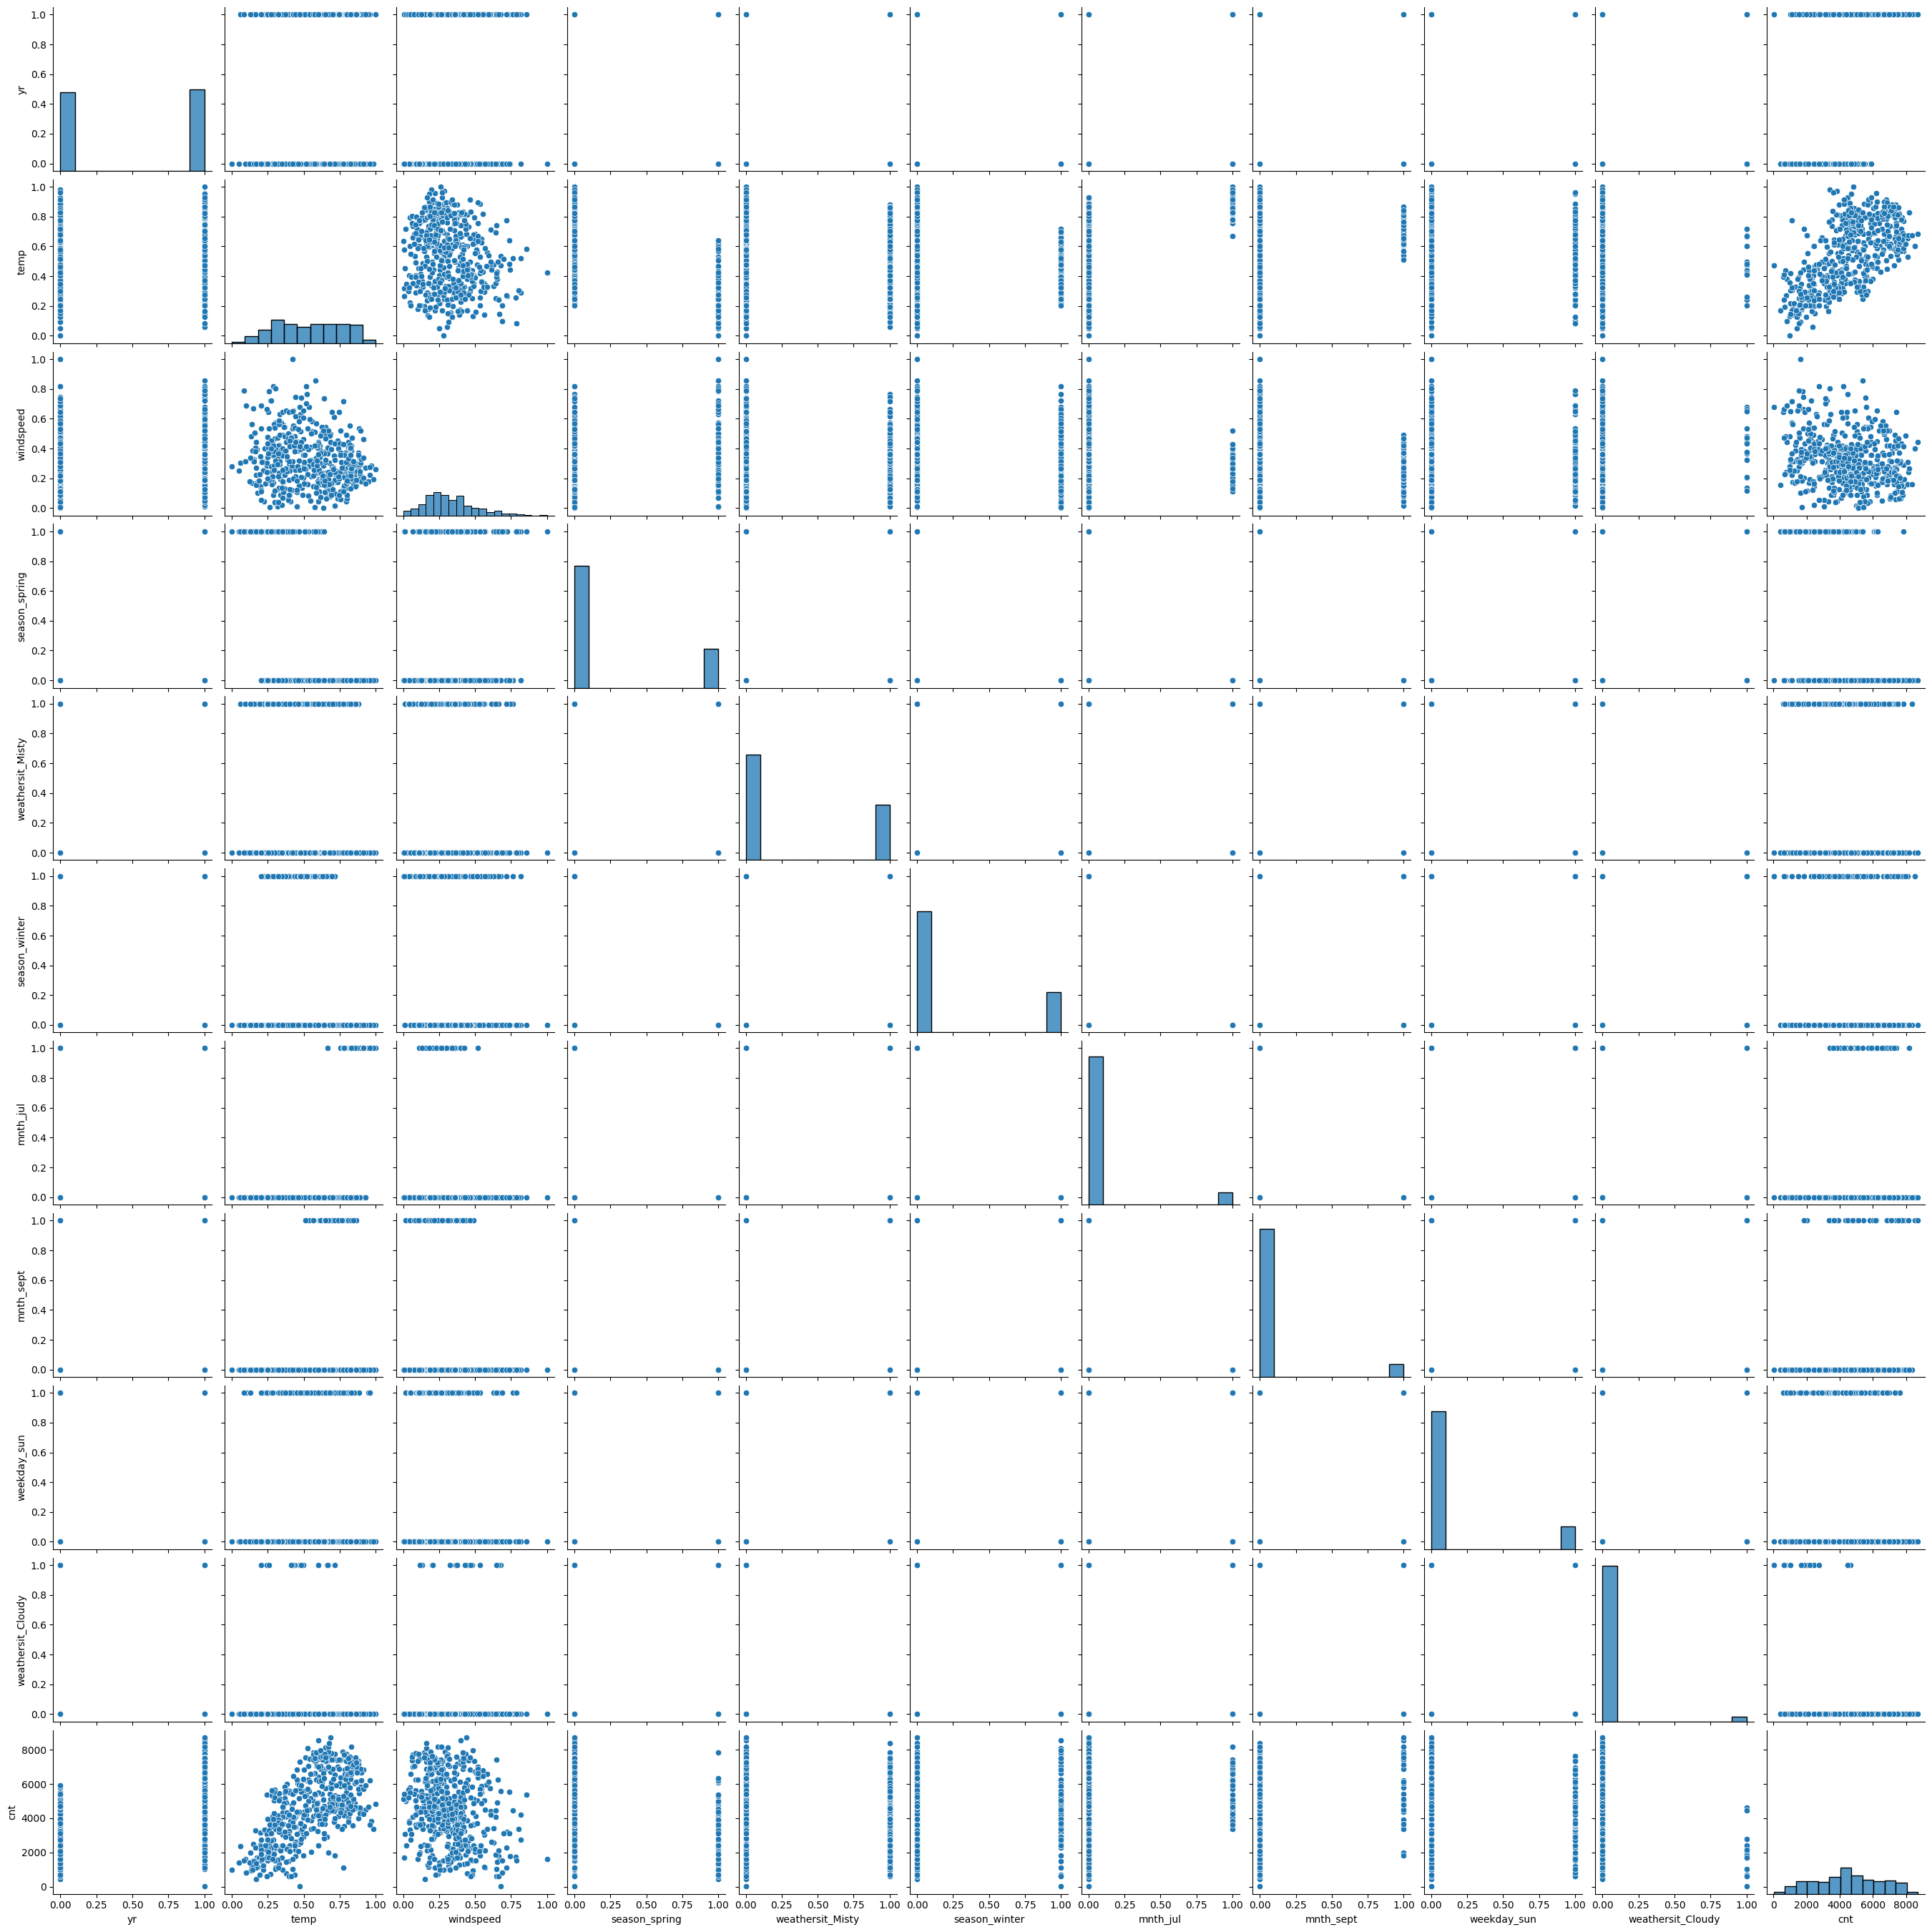

In [44]:
# Draw pairplots to check linearity between dependent variable and indepdendent variable
plt.figure(figsize = (15,30))
sns.pairplot(data=pd.concat([X_train, y_train], axis=1),vars=['yr', 'temp', 'windspeed', 'season_spring', 'weathersit_Misty', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sun', 'weathersit_Cloudy', 'cnt'])
plt.show()


## Step 7. Model Evaluation 
### 7.1 Residucal Analysis

In [45]:
#Let us build the final model using sklearn
#Build a model with above columns
lr = LinearRegression()
lr.fit(X_train[X_train_rfe.columns],y_train)
print(lr.intercept_,lr.coef_)

2265.444146051643 [ 2043.47164551  3911.37327929 -1225.05300436  -994.84115218
   392.371253    -608.63841549   451.13670936  -388.96387653
 -2490.897647    -696.54149971]


In [46]:
y_train_pred = lr.predict(X_train[X_train_rfe.columns])

In [47]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

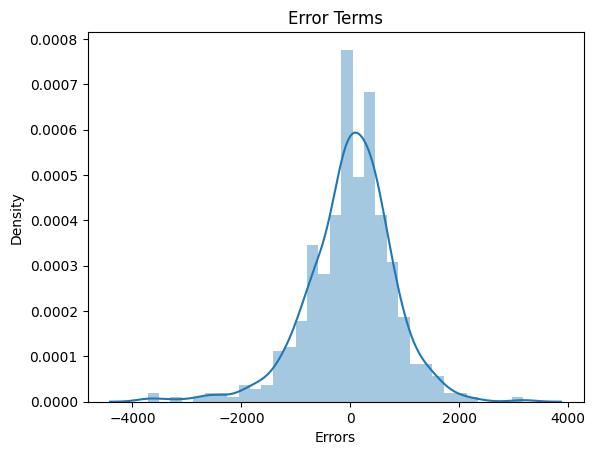

In [48]:
plot_res_dist(y_train, y_train_pred)

#### Errors are normally distribured here with mean 0. So everything seems to be fine

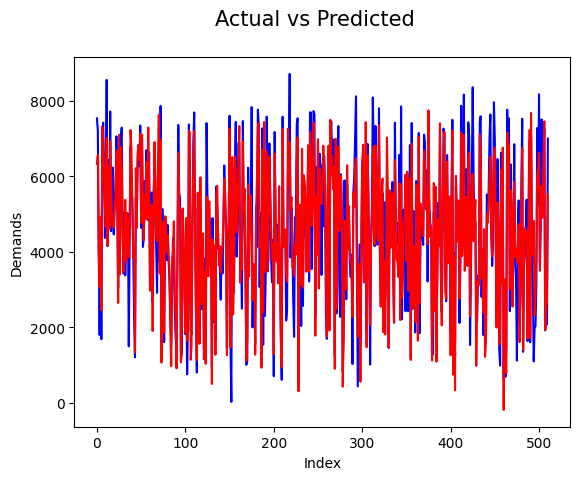

In [49]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

#### Actual and Predicted result following almost the same pattern so this model seems ok

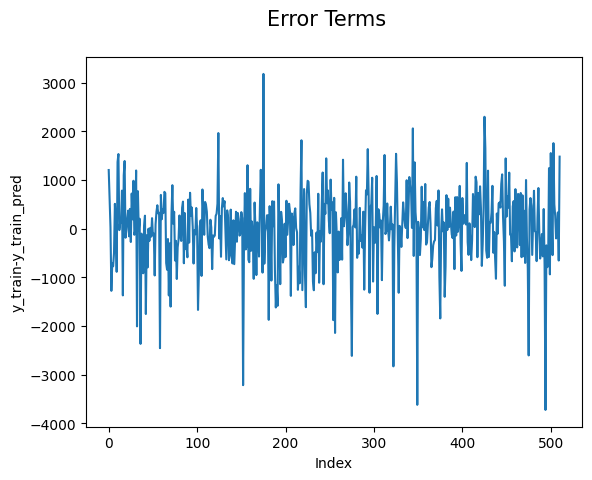

In [50]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

#### Here,If we see the error terms are independent of each other.

In [51]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8323266631335122

### Inference
R2 Same as we obtained for our final model

### 7.2 Linearity Check

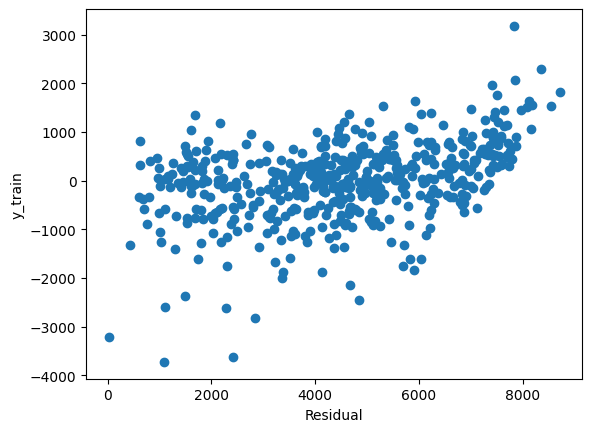

In [52]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

### 7.3 Predict values for test data set

In [53]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed','business_age']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [54]:
#Predict the values for test data
y_test_pred = lr.predict(X_test[X_train_rfe.columns])

### 7.4 R-Squared value for test predictions

In [55]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.8089751615391355

##### Inference
R2 value for predictions on test data (0.81) is almost same as R2 value of train data (0.83). This is a good R-squared value, hence we can say this model is performing good even on unseen data (test data)

### 7.5 Homoscedacity

Text(0, 0.5, 'y_test_pred')

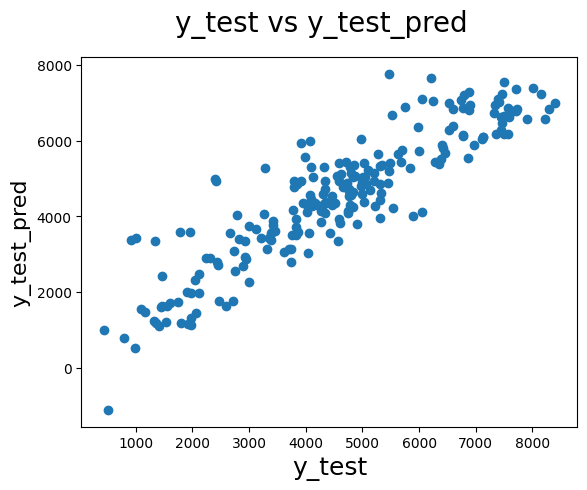

In [56]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
# heading 
fig.suptitle('y_test vs y_test_pred', fontsize = 20)
# X-label
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_test_pred', fontsize = 16)

####  Inference
We can observe that variance of the residuals (error terms) is constant across predictions.  i.e error term does not vary much as the value of the predictor variable changes.

### 7.8 Plot Test vs Predicted test values

In [57]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    # heading 
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)
    # X-label
    plt.xlabel('Index', fontsize=18)
    # Y-label
    plt.ylabel('Counts', fontsize=16)

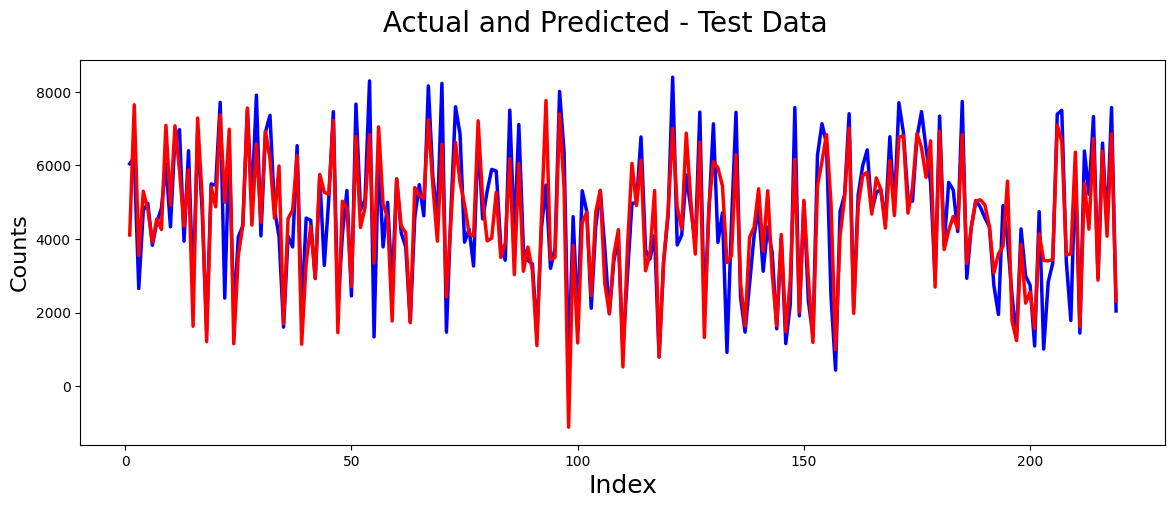

In [58]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

#### Inference
As we can see predictions for test data is very close to actuals

#### Inference
As we can see predictions for test data is very close to actuals

### 7.9 Plot Error Terms for test data

In [59]:
# Error terms
def plot_err_terms(act,pred):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    # heading
    fig.suptitle('Error Terms', fontsize=20)
    # X-label
    plt.xlabel('Index', fontsize=18)
    # Y-label
    plt.ylabel('Counts - Predicted Counts', fontsize=16)

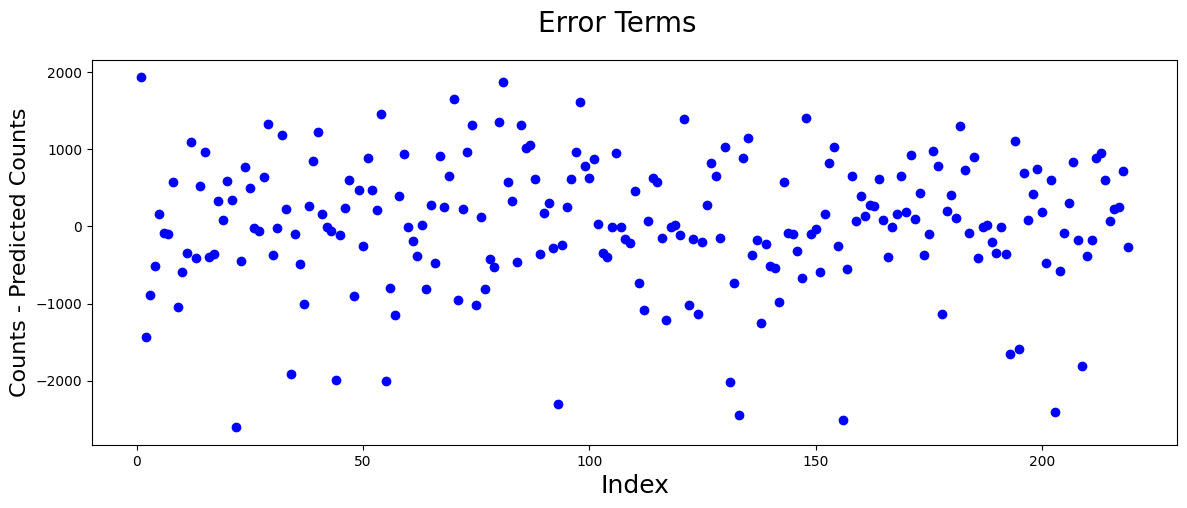

In [60]:
#Plot error terms for test data
plot_err_terms(y_test,y_test_pred)

#### Inference
As we can see the error terms are randomly distributed and there is no pattern which means the output is explained well by the model and there are no other parameters that can explain the model better.

### 8. Making Predictions

In [61]:
# Checking data before scaling
bikeSharingData.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,business_age,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Cloudy,weathersit_Misty
0,0,0,0,14.110847,18.18125,80.5833,10.749882,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,1,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,2,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,3,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,4,1,0,...,0,0,0,0,0,0,0,1,0,0


### 8.1 Intrepreting the Model

In [62]:
print(f'intercept = {lr.intercept_}')
print(f'feature coefficients -> \n {list(zip(lr.coef_, lr.feature_names_in_))}')

intercept = 2265.444146051643
feature coefficients -> 
 [(2043.4716455097307, 'yr'), (3911.373279292804, 'temp'), (-1225.0530043627728, 'windspeed'), (-994.8411521813921, 'season_spring'), (392.37125300399134, 'season_winter'), (-608.6384154894533, 'mnth_jul'), (451.1367093593243, 'mnth_sept'), (-388.96387653277856, 'weekday_sun'), (-2490.8976470042176, 'weathersit_Cloudy'), (-696.5414997070739, 'weathersit_Misty')]


### Analysing the above model, the comapany should focus on the following features:
- BoomBikes should focus on expanding business during Spring.
- BoomBikes should focus on expanding business during holidays.
- Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019 since we see year over year increase in demand.
- There would be less bookings during Light to Heavy Snow or Rain, they could probably use this time to serive the bikes without having business impact

### Conclusion
Significant variables to predict the demand for shared bikes
- holiday
- temp
- Season (Specially Spring and Winter)
- months(January, July, September, November, December)
- Year (There is trend of year over year increase in demand in general)
- Sunday
- weathersit(<Clear, Few clouds, Partly cloudy, Partly cloudy and Mist> and <Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist>
)